![Fixel Algorithms](https://fixelalgorithms.co/images/CCExt.png)

# <center> Machine Learning Methods </center>
## <center> Lecture 16 - Clustering</center>
### <center> Gaussian Mixture Model (GMM)</center>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/FixelAlgorithmsTeam/FixelCourses/blob/master/MachineLearningMethod/16_Clustering/MainGMM1.ipynb)

In [1]:
import numpy             as np
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rc('font', **{'size' : 16})

np.random.seed(2)

### Generate some data:

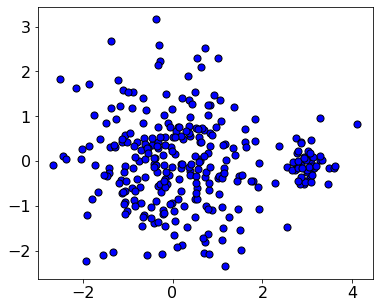

In [2]:
N1  = 250
N2  = 50
N   = N1 + N2
mX1 = np.random.randn(N1, 2)
mX2 = np.random.randn(N2, 2) / 4 + [3, 0]
mX  = np.r_[mX1, mX2]

plt.figure(figsize=(6,5))
plt.scatter(mX[:,0], mX[:,1], s=50, edgecolors='k', color='b')
plt.axis('equal')
plt.axis('tight')
vAxis = plt.axis()
plt.show()

### A simple implementation of the GMM algorithm:
#### Step I:
Assume fixed parameters $\left\{ w_{k}\right\} ,$$\left\{ \boldsymbol{\mu}_{k}\right\} $,
and $\left\{ \boldsymbol{\Sigma}_{k}\right\} $.  
Compute the probability that $\boldsymbol{x}_{i}$ belong to $\mathcal{D}_{k}$

$$
P_{X_{i}}\left(k\right)=\frac{w_{k}\mathcal{N}\left(\boldsymbol{x}_{i};\boldsymbol{\mu}_{k},\boldsymbol{\Sigma}_{k}\right)}{\sum_{k'=1}^{K}w_{k'}\mathcal{N}\left(\boldsymbol{x}_{i};\boldsymbol{\mu}_{k'},\boldsymbol{\Sigma}_{k'}\right)}
$$

#### Step II:
Assume fixed probabilities $P_{X_{i}}\left(k\right)$.  
Update the parameters $\left\{ w_{k}\right\} ,$$\left\{ \boldsymbol{\mu}_{k}\right\} $,
and $\left\{ \boldsymbol{\Sigma}_{k}\right\} $ by:

$$
N_{k}:=\sum_{i=1}^{N}P_{X_{i}}\left(k\right),
$$

$$
w_{k}=\frac{N_{k}}{N},
$$

$$
\boldsymbol{\mu}_{k}=\frac{1}{N}\sum_{i=1}^{N}P_{X_{i}}\left(k\right)\boldsymbol{x}_{i},
$$

$$
\boldsymbol{\Sigma}_{k}=\frac{1}{N_{k}}\sum_{i=1}^{N}P_{X_{i}}\left(k\right)\left(\boldsymbol{x}_{i}-\boldsymbol{\mu}_{k}\right)\left(\boldsymbol{x}_{i}-\boldsymbol{\mu}_{k}\right)^{T}
$$

In [3]:
import scipy.stats
import scipy as sp

#-- N(x; mu, sig^2):
def Pz(x, w, vMu, mSig):
    return w * sp.stats.multivariate_normal.pdf(x, vMu, mSig)

def EstimateGmmParams(mX, vW, mMu, mSig):

    lMu     = [mMu.copy()]
    lW      = [vW.copy()]
    lSig    = [mSig.copy()]
    numIter = 30
    for ii in range(numIter):
        #-- Step 1, estimate probabilites:
        Px1  = Pz(mX, vW0[0], mMu0[:,0], mSig0[:,:,0])
        Px2  = Pz(mX, vW0[1], mMu0[:,1], mSig0[:,:,1])
        vSum = Px1 + Px2
        Px1  = Px1 / vSum
        Px2  = Px2 / vSum

        #-- Step 2, estimate params:
        N1          = np.sum(Px1)
        N2          = np.sum(Px2)
        vW[0]       = N1 / N
        vW[1]       = N2 / N
        mMu[:,0]    = np.sum(Px1[:,None] * mX, axis=0) / N1
        mMu[:,1]    = np.sum(Px2[:,None] * mX, axis=0) / N2
        mSig[:,:,0] = (Px1[:,None] * (mX - mMu0[:,0])).T @ (mX - mMu0[:,0]) / N1
        mSig[:,:,1] = (Px2[:,None] * (mX - mMu0[:,1])).T @ (mX - mMu0[:,1]) / N2

        lW.append(vW.copy())    
        lMu.append(mMu.copy())    
        lSig.append(mSig.copy())
        
    return lW, lMu, lSig

### Set some initial conditions:

In [4]:
vMu1   = [-1.0, 0.0]
vMu2   = [2.0, -1.0]
mSig1  = np.eye(2)
mSig2  = np.eye(2)
w1     = 1/2
w2     = 1/2

vW0     = np.r_[w1, w2]
mMu0    = np.c_[vMu1, vMu2]
mSig0   = np.dstack((mSig1, mSig2))

lW, lMu, lSig = EstimateGmmParams(mX, vW0, mMu0, mSig0)

###  Plot:

In [5]:
def PlotGMM(mX, lW, lMu, lSig, vAxis, iteration):
    
    x1       = np.linspace(vAxis[0], vAxis[1])
    x2       = np.linspace(vAxis[2], vAxis[3])
    XX1, XX2 = np.meshgrid(x1, x2)
    XX       = np.c_[XX1.ravel(), XX2.ravel()]
    
    mMu  = lMu[iteration]
    mSig = lSig[iteration]
    vW   = lW[iteration]
    
    Px1  = Pz(mX, vW[0], mMu[:,0], mSig[:,:,0])
    Px2  = Pz(mX, vW[1], mMu[:,1], mSig[:,:,1])
    vIdx = Px1 > Px2
    mP1  = np.reshape(Pz(XX, vW[0], mMu[:,0], mSig[:,:,0]), XX1.shape)
    mP2  = np.reshape(Pz(XX, vW[1], mMu[:,1], mSig[:,:,1]), XX1.shape)
    
    fig = plt.figure(figsize=(6,5))
    plt.scatter(mX[:,0], mX[:,1], s=50, edgecolors='k', c=vIdx)
    plt.plot(mMu[0,:], mMu[1,:], '.r', markersize=20)
    plt.contour(XX1, XX2, mP1, colors='orange', levels=3)
    plt.contour(XX1, XX2, mP2, colors='cyan', levels=3)
    plt.axis('equal')
#     plt.axis([-12, 8, -12, 8])
    

In [6]:
from ipywidgets import interact, IntSlider, Layout

PlotAux    = lambda iteration: PlotGMM(mX, lW, lMu, lSig, vAxis, iteration)
iterSlider = IntSlider(min=0, max=30, step=1, value=0, layout=Layout(width='80%'))
interact(PlotAux, iteration=iterSlider)
plt.show()

interactive(children=(IntSlider(value=0, description='iteration', layout=Layout(width='80%'), max=30), Output(…

### Trying a different dataset:

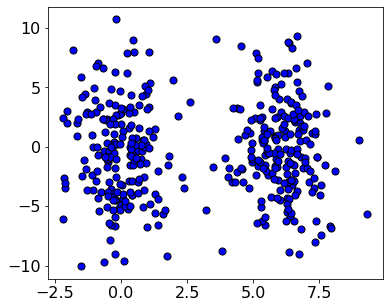

In [7]:
N1   = 200
N2   = 200
N    = N1 + N2
mSig = np.array([[1, 0], [0, 4]])
mX1  = np.random.randn(N1, 2) @ mSig
mX2  = np.random.randn(N2, 2) @ mSig + [6, 0]
mX   = np.r_[mX1, mX2]

plt.figure(figsize=(6,5))
plt.scatter(mX[:,0], mX[:,1], s=50, edgecolors='k', color='b')
plt.axis('equal')
plt.axis('tight')
vAxis = plt.axis()
plt.show()

### Set some initial conditions:

In [8]:
vMu1  = [-0.2, 5.0]
vMu2  = [0.2,  6.0]
mSig1 = np.eye(2)
mSig2 = np.eye(2)
w1    = 1/2
w2    = 1/2

vW0     = np.r_[w1, w2]
mMu0    = np.c_[vMu1, vMu2]
mSig0   = np.dstack((mSig1, mSig2))

lW, lMu, lSig = EstimateGmmParams(mX, vW0, mMu0, mSig0)

### Plot:

In [9]:
PlotAux    = lambda iteration: PlotGMM(mX, lW, lMu, lSig, vAxis, iteration)
iterSlider = IntSlider(min=0, max=30, step=1, value=0, layout=Layout(width='80%'))
interact(PlotAux, iteration=iterSlider)
plt.show()

interactive(children=(IntSlider(value=0, description='iteration', layout=Layout(width='80%'), max=30), Output(…

### Sk-learm GMM:

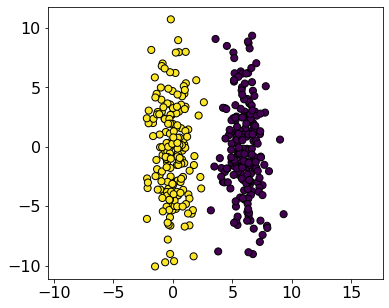

In [26]:
from sklearn.mixture import GaussianMixture

vIdx = GaussianMixture(n_components=2, n_init=10).fit_predict(mX)

fig = plt.figure(figsize=(6,5))
plt.scatter(mX[:,0], mX[:,1], s=50, edgecolors='k', c=vIdx)
plt.axis('equal')
plt.show()